
Average Valence Intensity by Question and Strength Bin:
 strength_bin          Q1        Q2        Q3        Q4
question_index                                        
1               0.575843  0.655214  0.647614  0.631343
2               0.518857  0.621571  0.616629  0.615486
3               0.547614  0.624286  0.620900  0.624171
4               0.588457  0.611500  0.620729  0.624914
5               0.608443  0.631914  0.627271  0.630914
6               0.468100  0.582329  0.607357  0.617886
7               0.604471  0.641071  0.654057  0.615314
8               0.545329  0.627114  0.619457  0.635600
9               0.534771  0.603843  0.606600  0.621086
10              0.689329  0.661343  0.636257  0.640257
11              0.478757  0.568914  0.621157  0.627229
12              0.576771  0.623557  0.632686  0.639686
13              0.509871  0.615314  0.634186  0.605343
14              0.561157  0.624829  0.629571  0.638086
15              0.531114  0.566743  0.596857  0.621686
16     

/tmp/ipykernel_119627/125199920.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


<Figure size 1200x600 with 0 Axes>

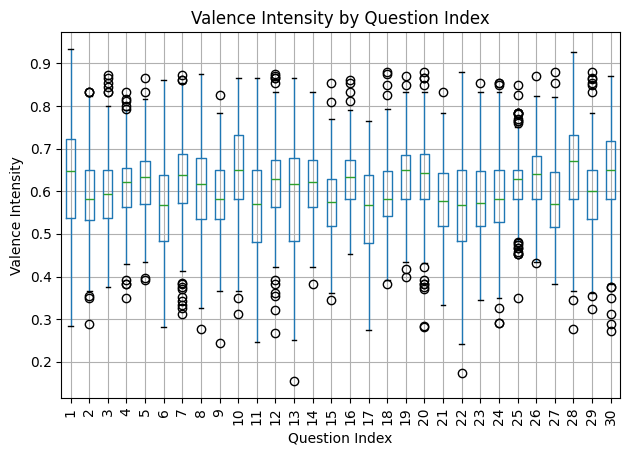

<Figure size 800x600 with 0 Axes>

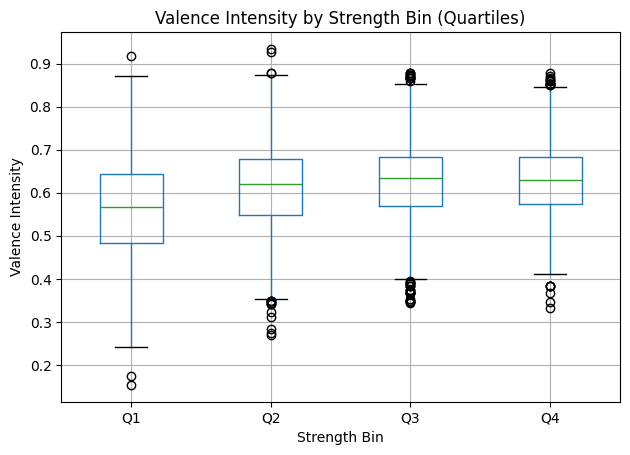

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load your data
df = pd.read_excel('/home/koalacrown/Desktop/Code/Projects/LLM_threapy/LLM_agumented_therapy/Cogexp/Valence/Big_one_7k.xlsx')

# 2) Create strength bins (quartiles)
df['strength_bin'] = pd.qcut(df['strength'], q=4, labels=['Q1','Q2','Q3','Q4'])

# 3) Pivot: average valence per question × strength-bin
pivot = df.pivot_table(
    index='question_index',
    columns='strength_bin',
    values='valence_intensity',
    aggfunc='mean'
).sort_index()
print("\nAverage Valence Intensity by Question and Strength Bin:\n", pivot)

# 4) Boxplot: Valence by Question Index
plt.figure(figsize=(12,6))
df.boxplot(column='valence_intensity', by='question_index')
plt.title('Valence Intensity by Question Index')
plt.suptitle('')               # remove automatic subtitle
plt.xlabel('Question Index')
plt.ylabel('Valence Intensity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5) Boxplot: Valence by Strength Bin
plt.figure(figsize=(8,6))
df.boxplot(column='valence_intensity', by='strength_bin')
plt.title('Valence Intensity by Strength Bin (Quartiles)')
plt.suptitle('')
plt.xlabel('Strength Bin')
plt.ylabel('Valence Intensity')
plt.tight_layout()
plt.show()


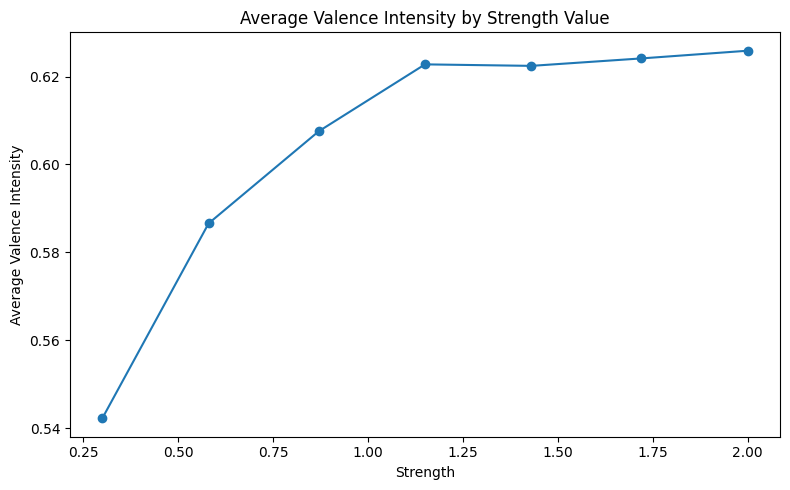

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/home/koalacrown/Desktop/Code/Projects/LLM_threapy/LLM_agumented_therapy/Cogexp/Valence/Big_one_7k.xlsx')

# Compute average valence by each actual strength value
avg_by_strength = df.groupby('strength')['valence_intensity'].mean().reset_index().sort_values('strength')


# Plot: Average Valence Intensity vs. Strength
plt.figure(figsize=(8, 5))
plt.plot(avg_by_strength['strength'], avg_by_strength['valence_intensity'], marker='o')
plt.title('Average Valence Intensity by Strength Value')
plt.xlabel('Strength')
plt.ylabel('Average Valence Intensity')
plt.tight_layout()
plt.show()

Avg Valence Intensity by Strength:
    strength  valence_intensity
0      0.30           0.542250
1      0.58           0.586587
2      0.87           0.607536
3      1.15           0.622763
4      1.43           0.622421
5      1.72           0.624116
6      2.00           0.625868


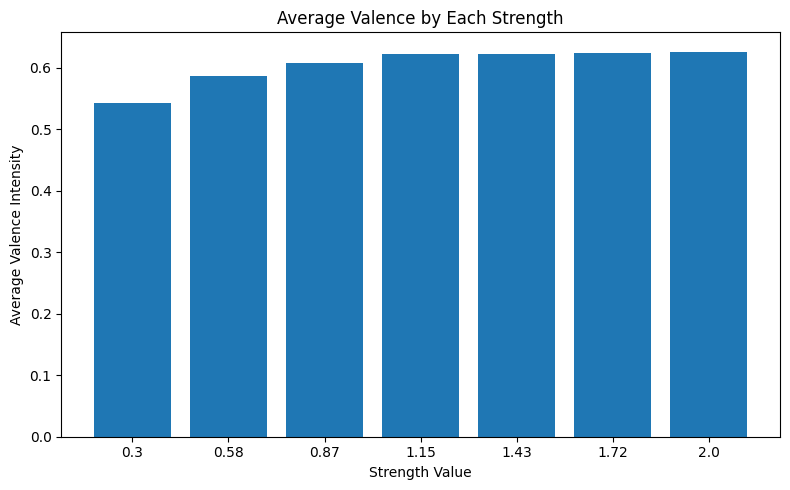


Valence Intensity by Question × Strength:
 strength         0.30   0.58   0.87   1.15   1.43   1.72   2.00
question_index                                                 
1               0.528  0.623  0.658  0.652  0.655  0.640  0.631
2               0.485  0.553  0.611  0.632  0.622  0.611  0.615
3               0.519  0.576  0.609  0.639  0.615  0.627  0.624
4               0.585  0.592  0.600  0.623  0.614  0.628  0.625
5               0.615  0.602  0.630  0.634  0.635  0.619  0.631
6               0.447  0.489  0.560  0.605  0.600  0.615  0.618
7               0.587  0.622  0.643  0.639  0.663  0.645  0.615
8               0.509  0.582  0.636  0.618  0.622  0.617  0.636
9               0.511  0.559  0.599  0.608  0.601  0.612  0.621
10              0.669  0.709  0.673  0.649  0.633  0.640  0.640
11              0.443  0.515  0.546  0.592  0.611  0.632  0.627
12              0.579  0.574  0.617  0.630  0.620  0.646  0.640
13              0.466  0.553  0.606  0.624  0.640  0.628  0.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load your data
df = pd.read_excel('/home/koalacrown/Desktop/Code/Projects/LLM_threapy/LLM_agumented_therapy/Cogexp/Valence/Big_one_7k.xlsx')

# 2) Compute average valence for each of the 8 strength values
avg_by_strength = (
    df
    .groupby('strength')['valence_intensity']
    .mean()
    .reset_index()
    .sort_values('strength')
)

print("Avg Valence Intensity by Strength:\n", avg_by_strength)

# 3) Plot it as a bar chart (or a line plot if you prefer)
plt.figure(figsize=(8,5))
plt.bar(avg_by_strength['strength'].astype(str), avg_by_strength['valence_intensity'])
plt.xlabel('Strength Value')
plt.ylabel('Average Valence Intensity')
plt.title('Average Valence by Each Strength')
plt.tight_layout()
plt.show()

# 4) (Optional) If you still want the breakdown by question *and* strength:
pivot = df.pivot_table(
    index='question_index',
    columns='strength',
    values='valence_intensity',
    aggfunc='mean'
)
print("\nValence Intensity by Question × Strength:\n", pivot.round(3))


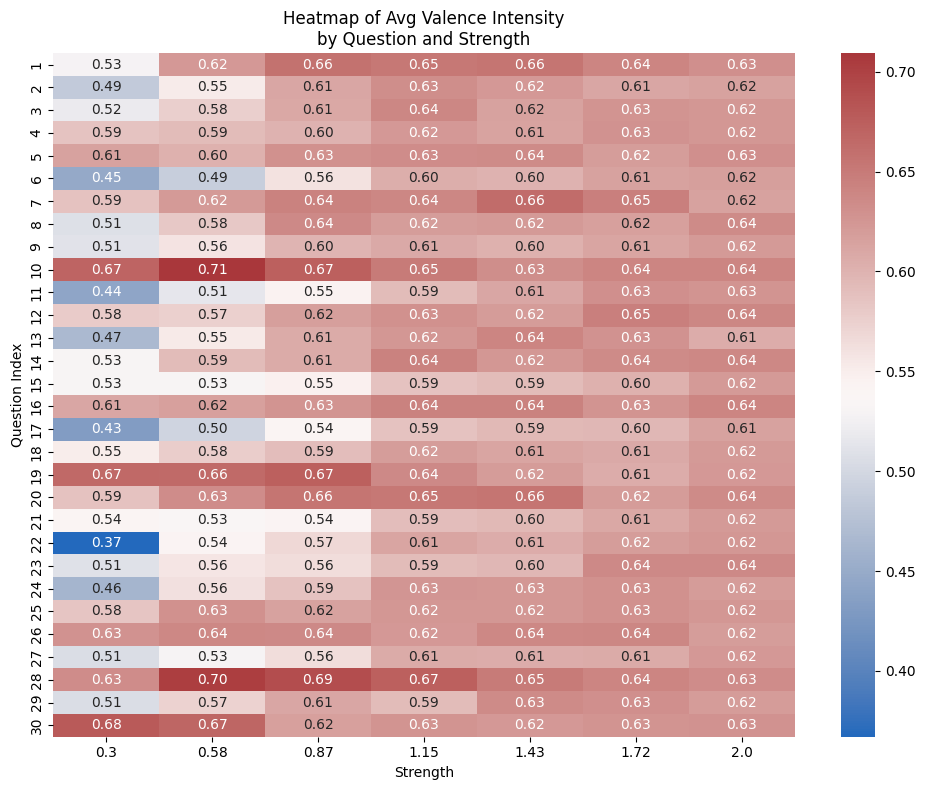

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pivot
pivot = df.pivot_table(
    index='question_index',
    columns='strength',
    values='valence_intensity',
    aggfunc='mean'
).sort_index()

# plot
plt.figure(figsize=(10,8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="vlag")
plt.title("Heatmap of Avg Valence Intensity\nby Question and Strength")
plt.xlabel("Strength")
plt.ylabel("Question Index")
plt.tight_layout()
plt.show()


In [5]:
from sklearn.cluster import KMeans
import numpy as np

X = df[['strength','valence_intensity','response_length']].values
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
df['cluster'] = kmeans.labels_

# visualize clusters
plt.scatter(df['strength'], df['valence_intensity'], c=df['cluster'], cmap='tab10')
plt.xlabel('Strength')
plt.ylabel('Valence Intensity')
plt.title('K-Means Clusters')
plt.show()


KeyError: "['response_length'] not in index"

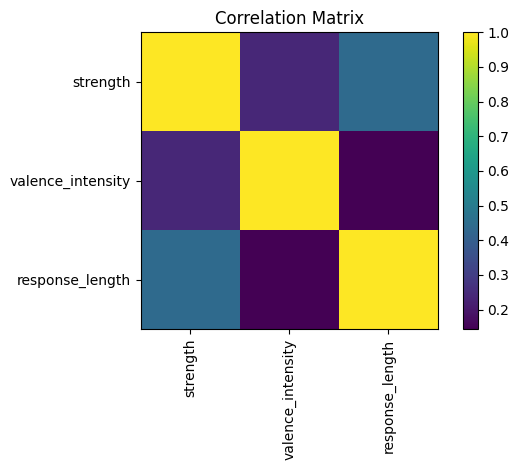

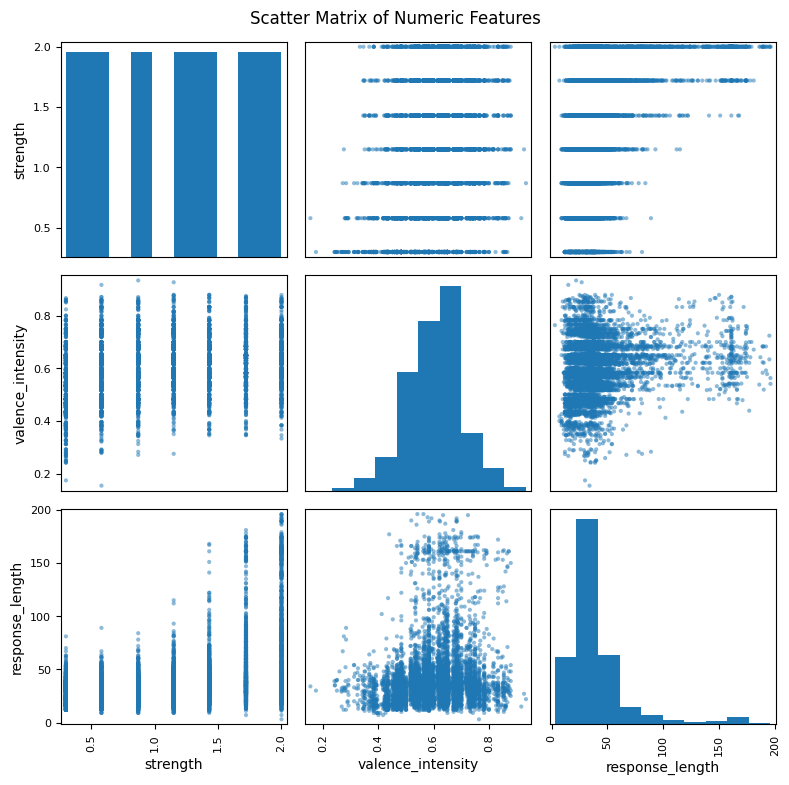

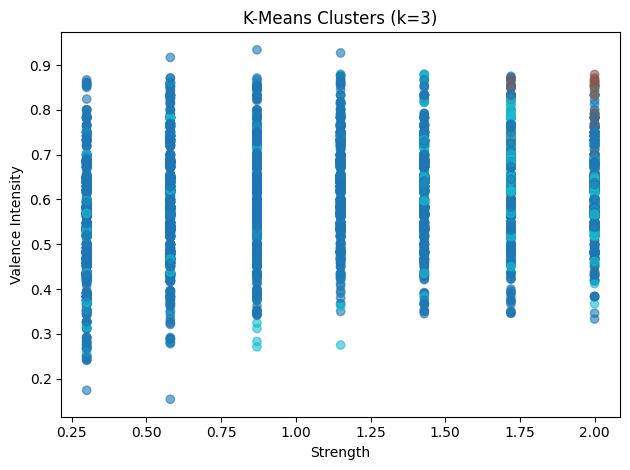

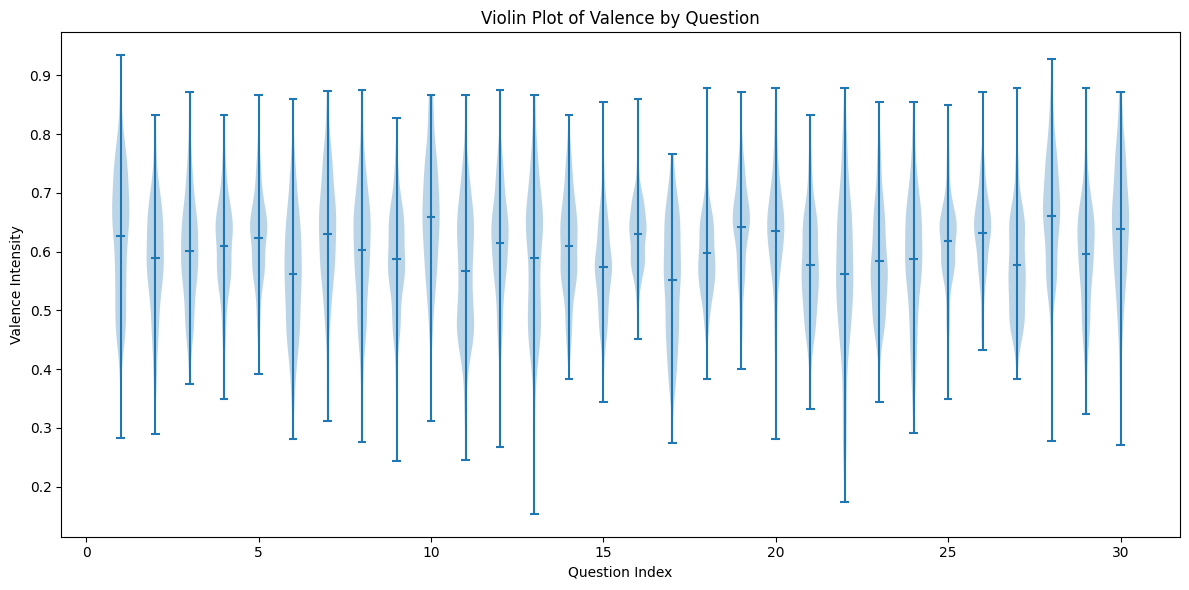

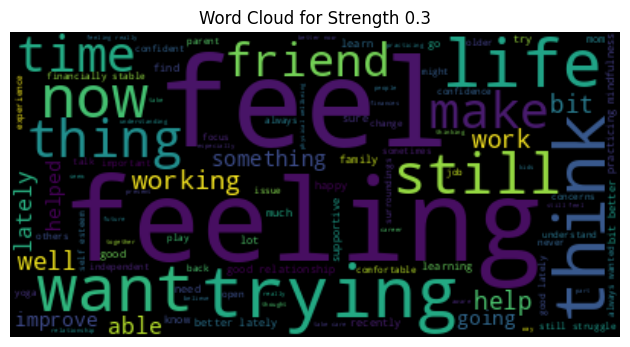

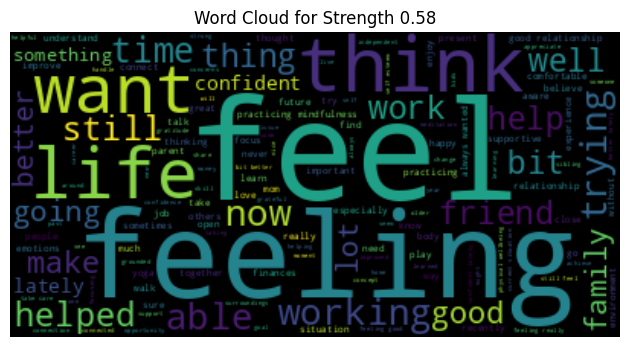

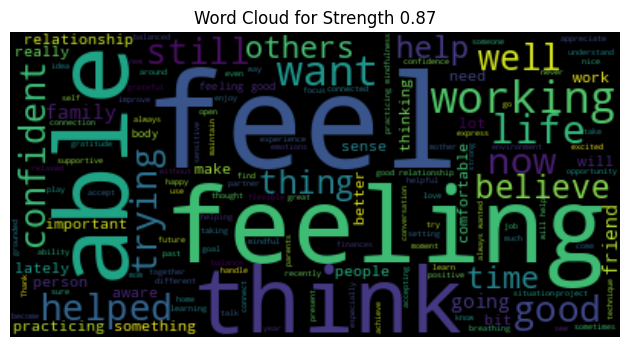

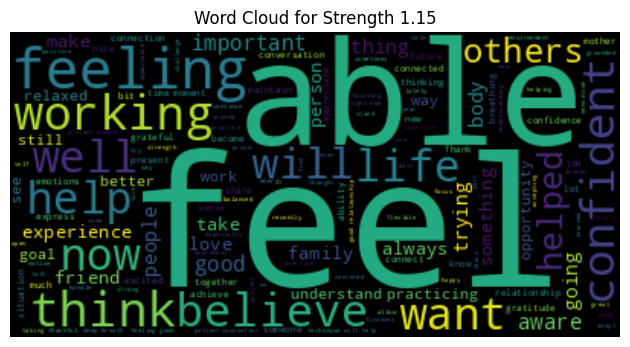

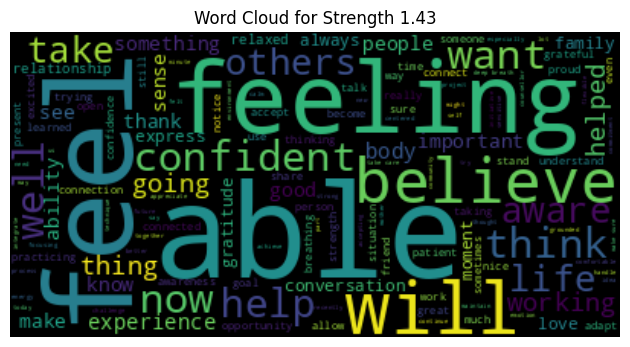

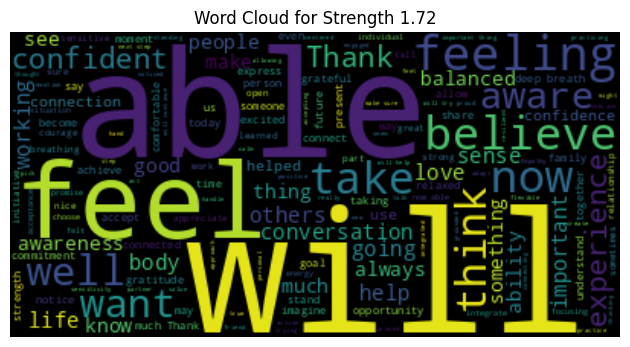

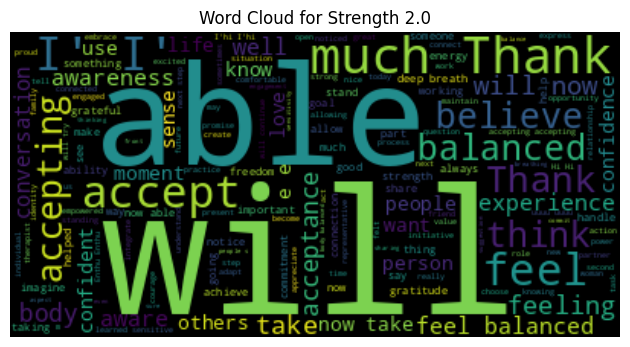

                            OLS Regression Results                            
Dep. Variable:      valence_intensity   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     444.4
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           7.87e-96
Time:                        21:42:27   Log-Likelihood:                 6570.3
No. Observations:                7350   AIC:                        -1.314e+04
Df Residuals:                    7348   BIC:                        -1.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5551      0.003    212.658      0.0

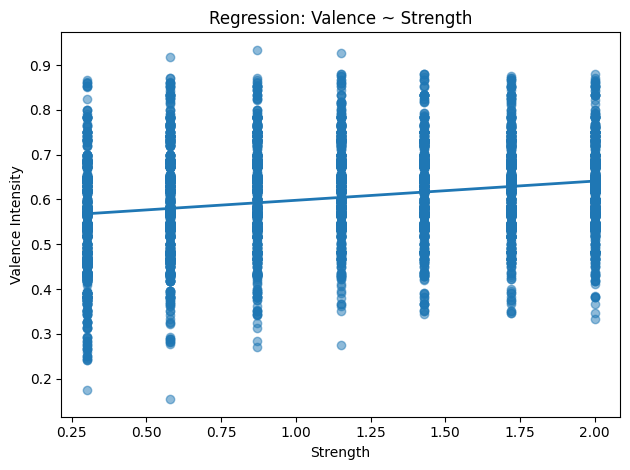

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import statsmodels.api as sm

# ─── Load Data & Compute Response Length ────────────────────────────────────
df = pd.read_excel('Big_one_7k.xlsx')
df['response_length'] = df['response'].str.split().str.len()

# ─── 2) Correlation Matrix & Scatter Matrix ─────────────────────────────────
numeric = df[['strength','valence_intensity','response_length']]
corr = numeric.corr()

# Correlation heatmap
plt.figure()
plt.imshow(corr.values, aspect='equal')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.index)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Scatter‐matrix of numeric features
scatter_matrix(numeric, diagonal='hist', alpha=0.5, figsize=(8,8))
plt.suptitle('Scatter Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# ─── 3) K-Means Clustering (k=3) ────────────────────────────────────────────
X = numeric.values
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
df['cluster'] = kmeans.labels_

plt.figure()
plt.scatter(df['strength'], df['valence_intensity'], c=df['cluster'], cmap='tab10', alpha=0.6)
plt.xlabel('Strength')
plt.ylabel('Valence Intensity')
plt.title('K-Means Clusters (k=3)')
plt.tight_layout()
plt.show()

# ─── 4) Violin Plot by Question ─────────────────────────────────────────────
questions = sorted(df['question_index'].unique())
groups = [df[df['question_index']==q]['valence_intensity'].values for q in questions]

plt.figure(figsize=(12,6))
plt.violinplot(groups, positions=questions, showmeans=True)
plt.xlabel('Question Index')
plt.ylabel('Valence Intensity')
plt.title('Violin Plot of Valence by Question')
plt.tight_layout()
plt.show()

# ─── 5) Word-Clouds by Strength Level ───────────────────────────────────────
for strength in sorted(df['strength'].unique()):
    text = " ".join(df.loc[df['strength']==strength, 'response'])
    wc = WordCloud(width=400, height=200).generate(text)
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Strength {strength}')
    plt.tight_layout()
    plt.show()

# ─── 6) Linear Regression: Valence ~ Strength ───────────────────────────────
X_lr = sm.add_constant(df['strength'])
y = df['valence_intensity']
model = sm.OLS(y, X_lr).fit()
print(model.summary())

# Plot scatter + regression line
plt.figure()
plt.scatter(df['strength'], df['valence_intensity'], alpha=0.5)
xs = pd.Series(sorted(df['strength'].unique()))
ys = model.params['const'] + model.params['strength'] * xs
plt.plot(xs, ys, linewidth=2)
plt.xlabel('Strength')
plt.ylabel('Valence Intensity')
plt.title('Regression: Valence ~ Strength')
plt.tight_layout()
plt.show()
